In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from pathlib import Path
from src.processor import Processor
from src.generator import Generator
from src.plotter import Plotter

# import scienceplots
# plt.style.use(['science', 'high-vis'])
# plt.rcParams['figure.dpi'] = 300

def find_repo_root(start: Path = Path.cwd()) -> Path:
    for parent in [start] + list(start.parents):
        if (parent / ".git").exists():
            return parent
    return start  # fallback: cwd

repo_root = find_repo_root()
os.chdir(repo_root)

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
processor = Processor(type_str="TT+EE+BB+TE")
theta, x = processor.load_simulations("01_all_Cls_reduced_prior_50000.pt")
x = processor.select_components(x, TT=True)
cl1 = x[0]
cl2 = x[1]
ell = torch.arange(cl1.shape[0], dtype=torch.float32, device=cl1.device)

In [4]:
map1 = processor.make_CMB_map(ell, cl1, N=2**10, pix_size=0.5)
map2 = processor.make_CMB_map(ell, cl2, N=2**10, pix_size=0.5)


In [5]:
plotter = Plotter.from_config()

map mean: 5.931343 map rms: 111.06823


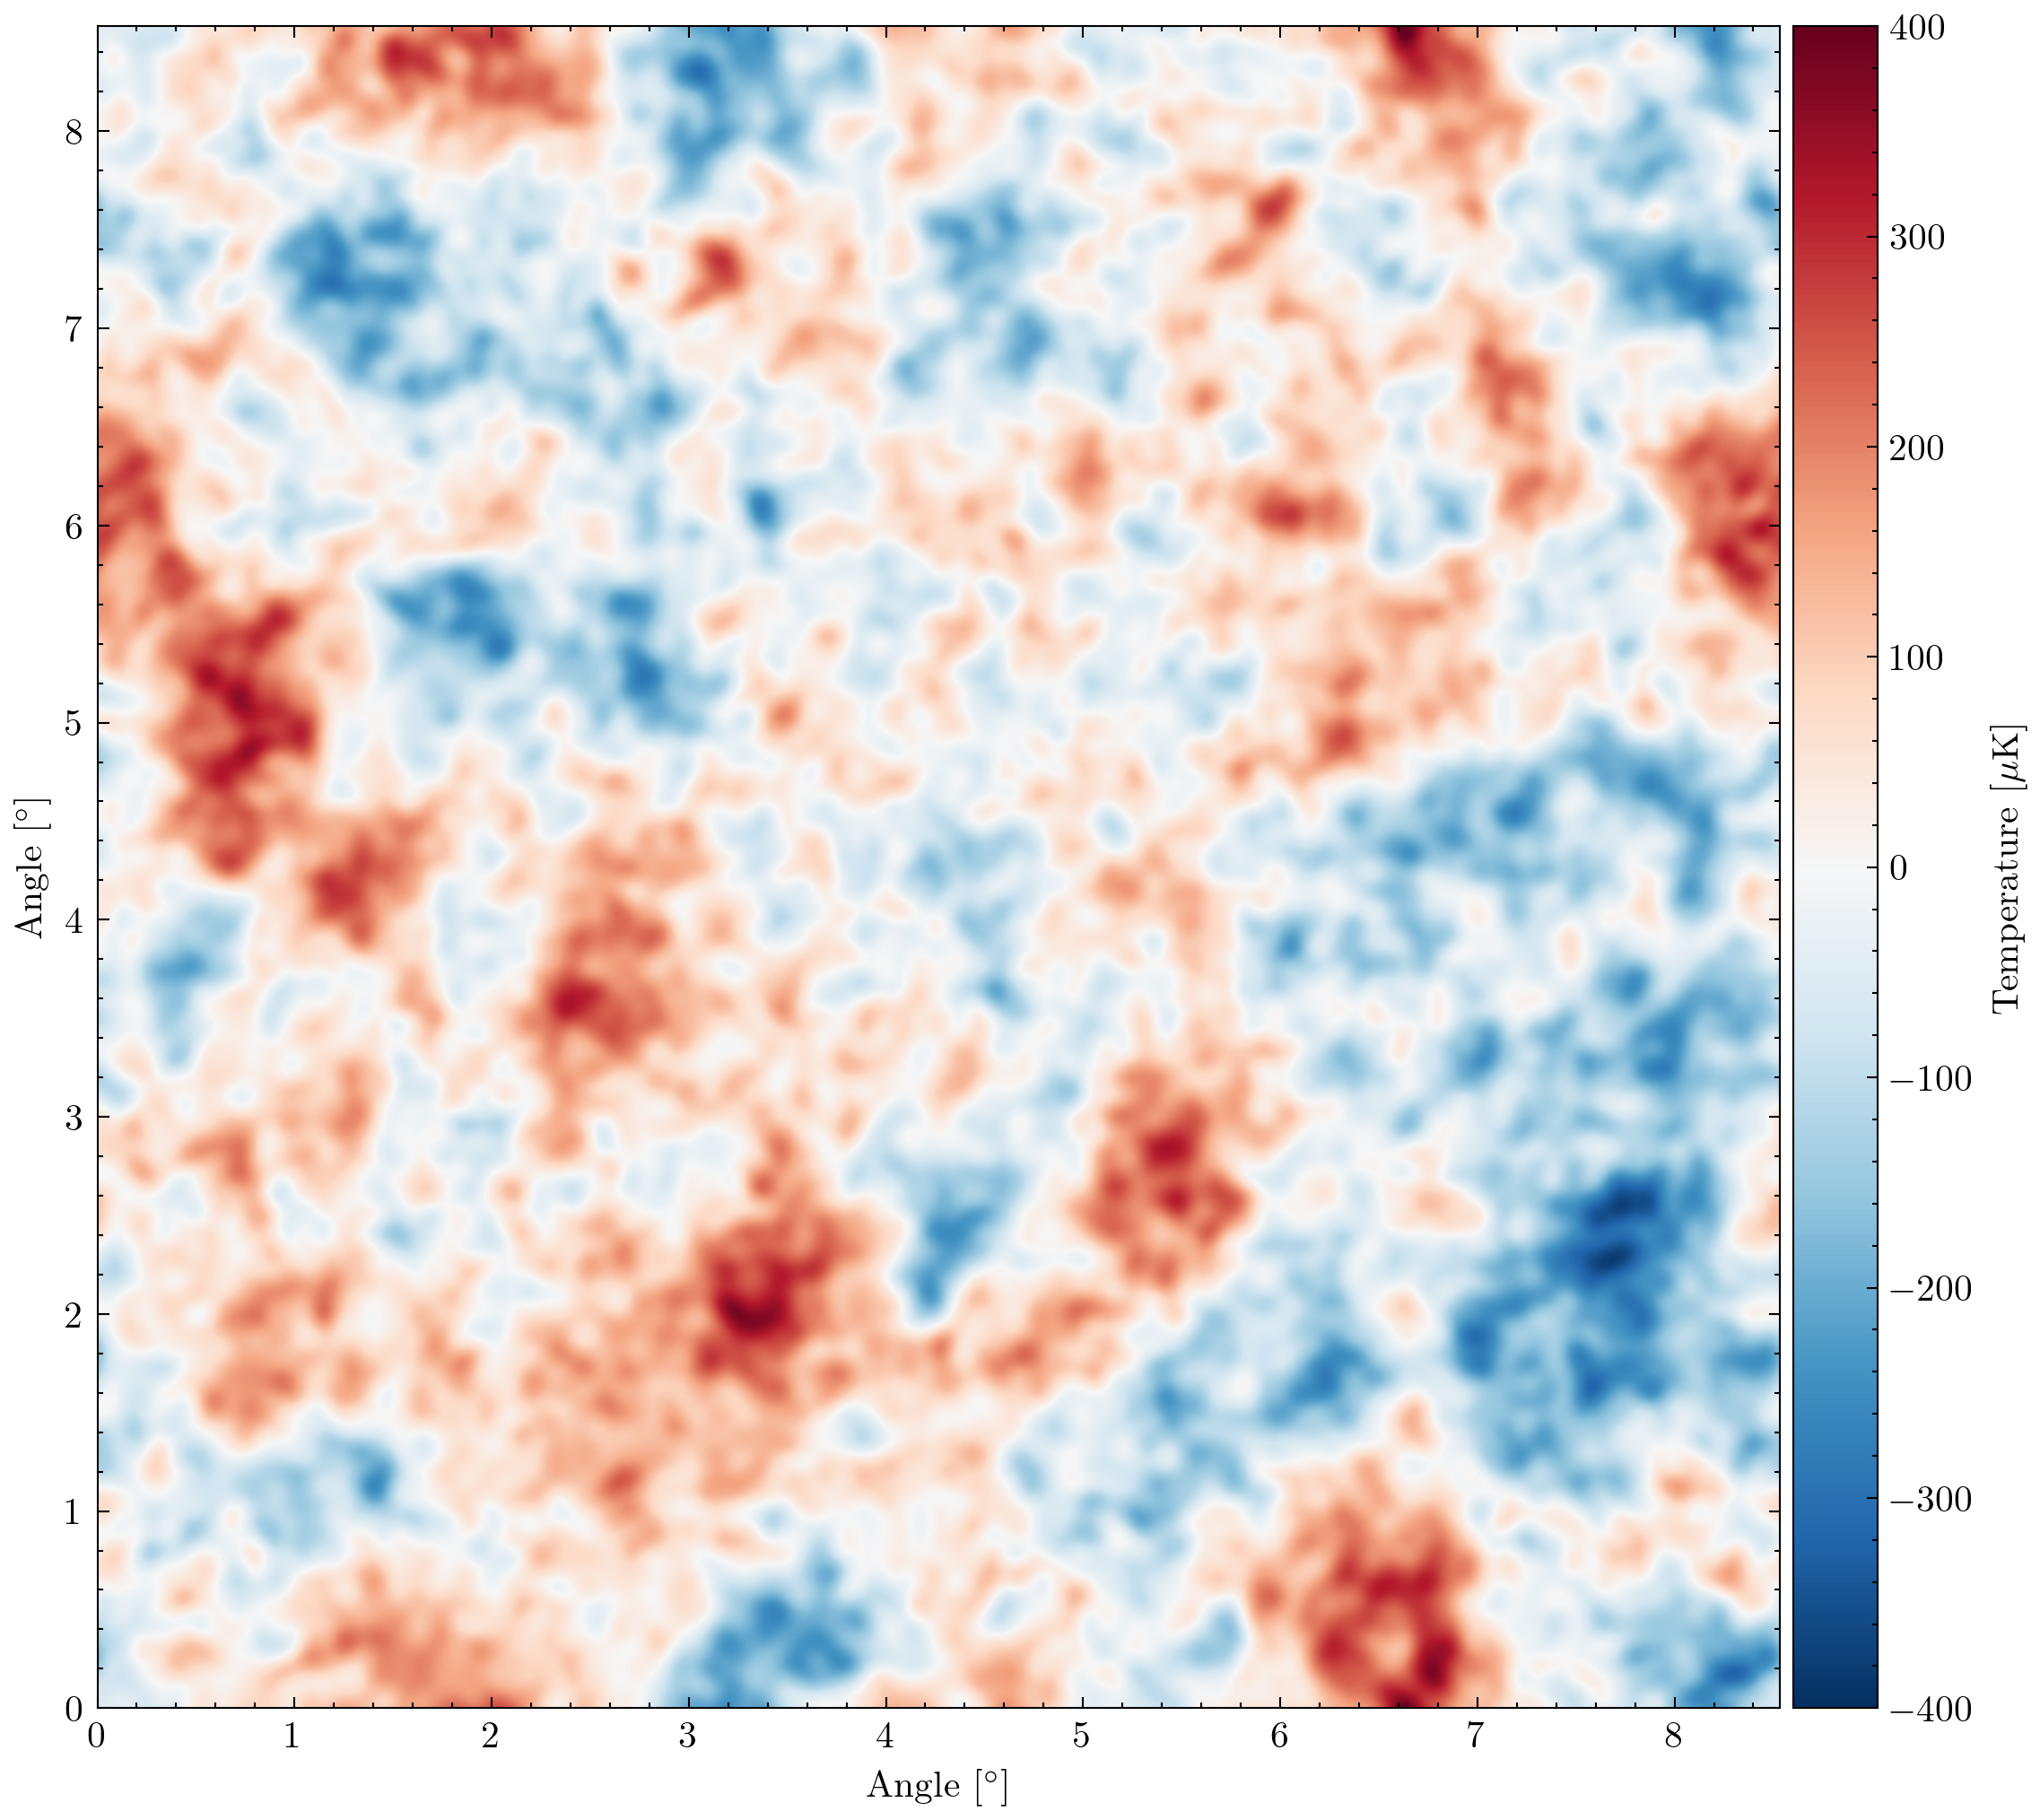

In [6]:
fig = plotter.plot_CMB_map(map1, c_min=-400, c_max=400, x_width=(2**10)*(0.5)/60, y_width=(2**10)*(0.5)/60)
plt.show()


map mean: 14.189037 map rms: 110.08824


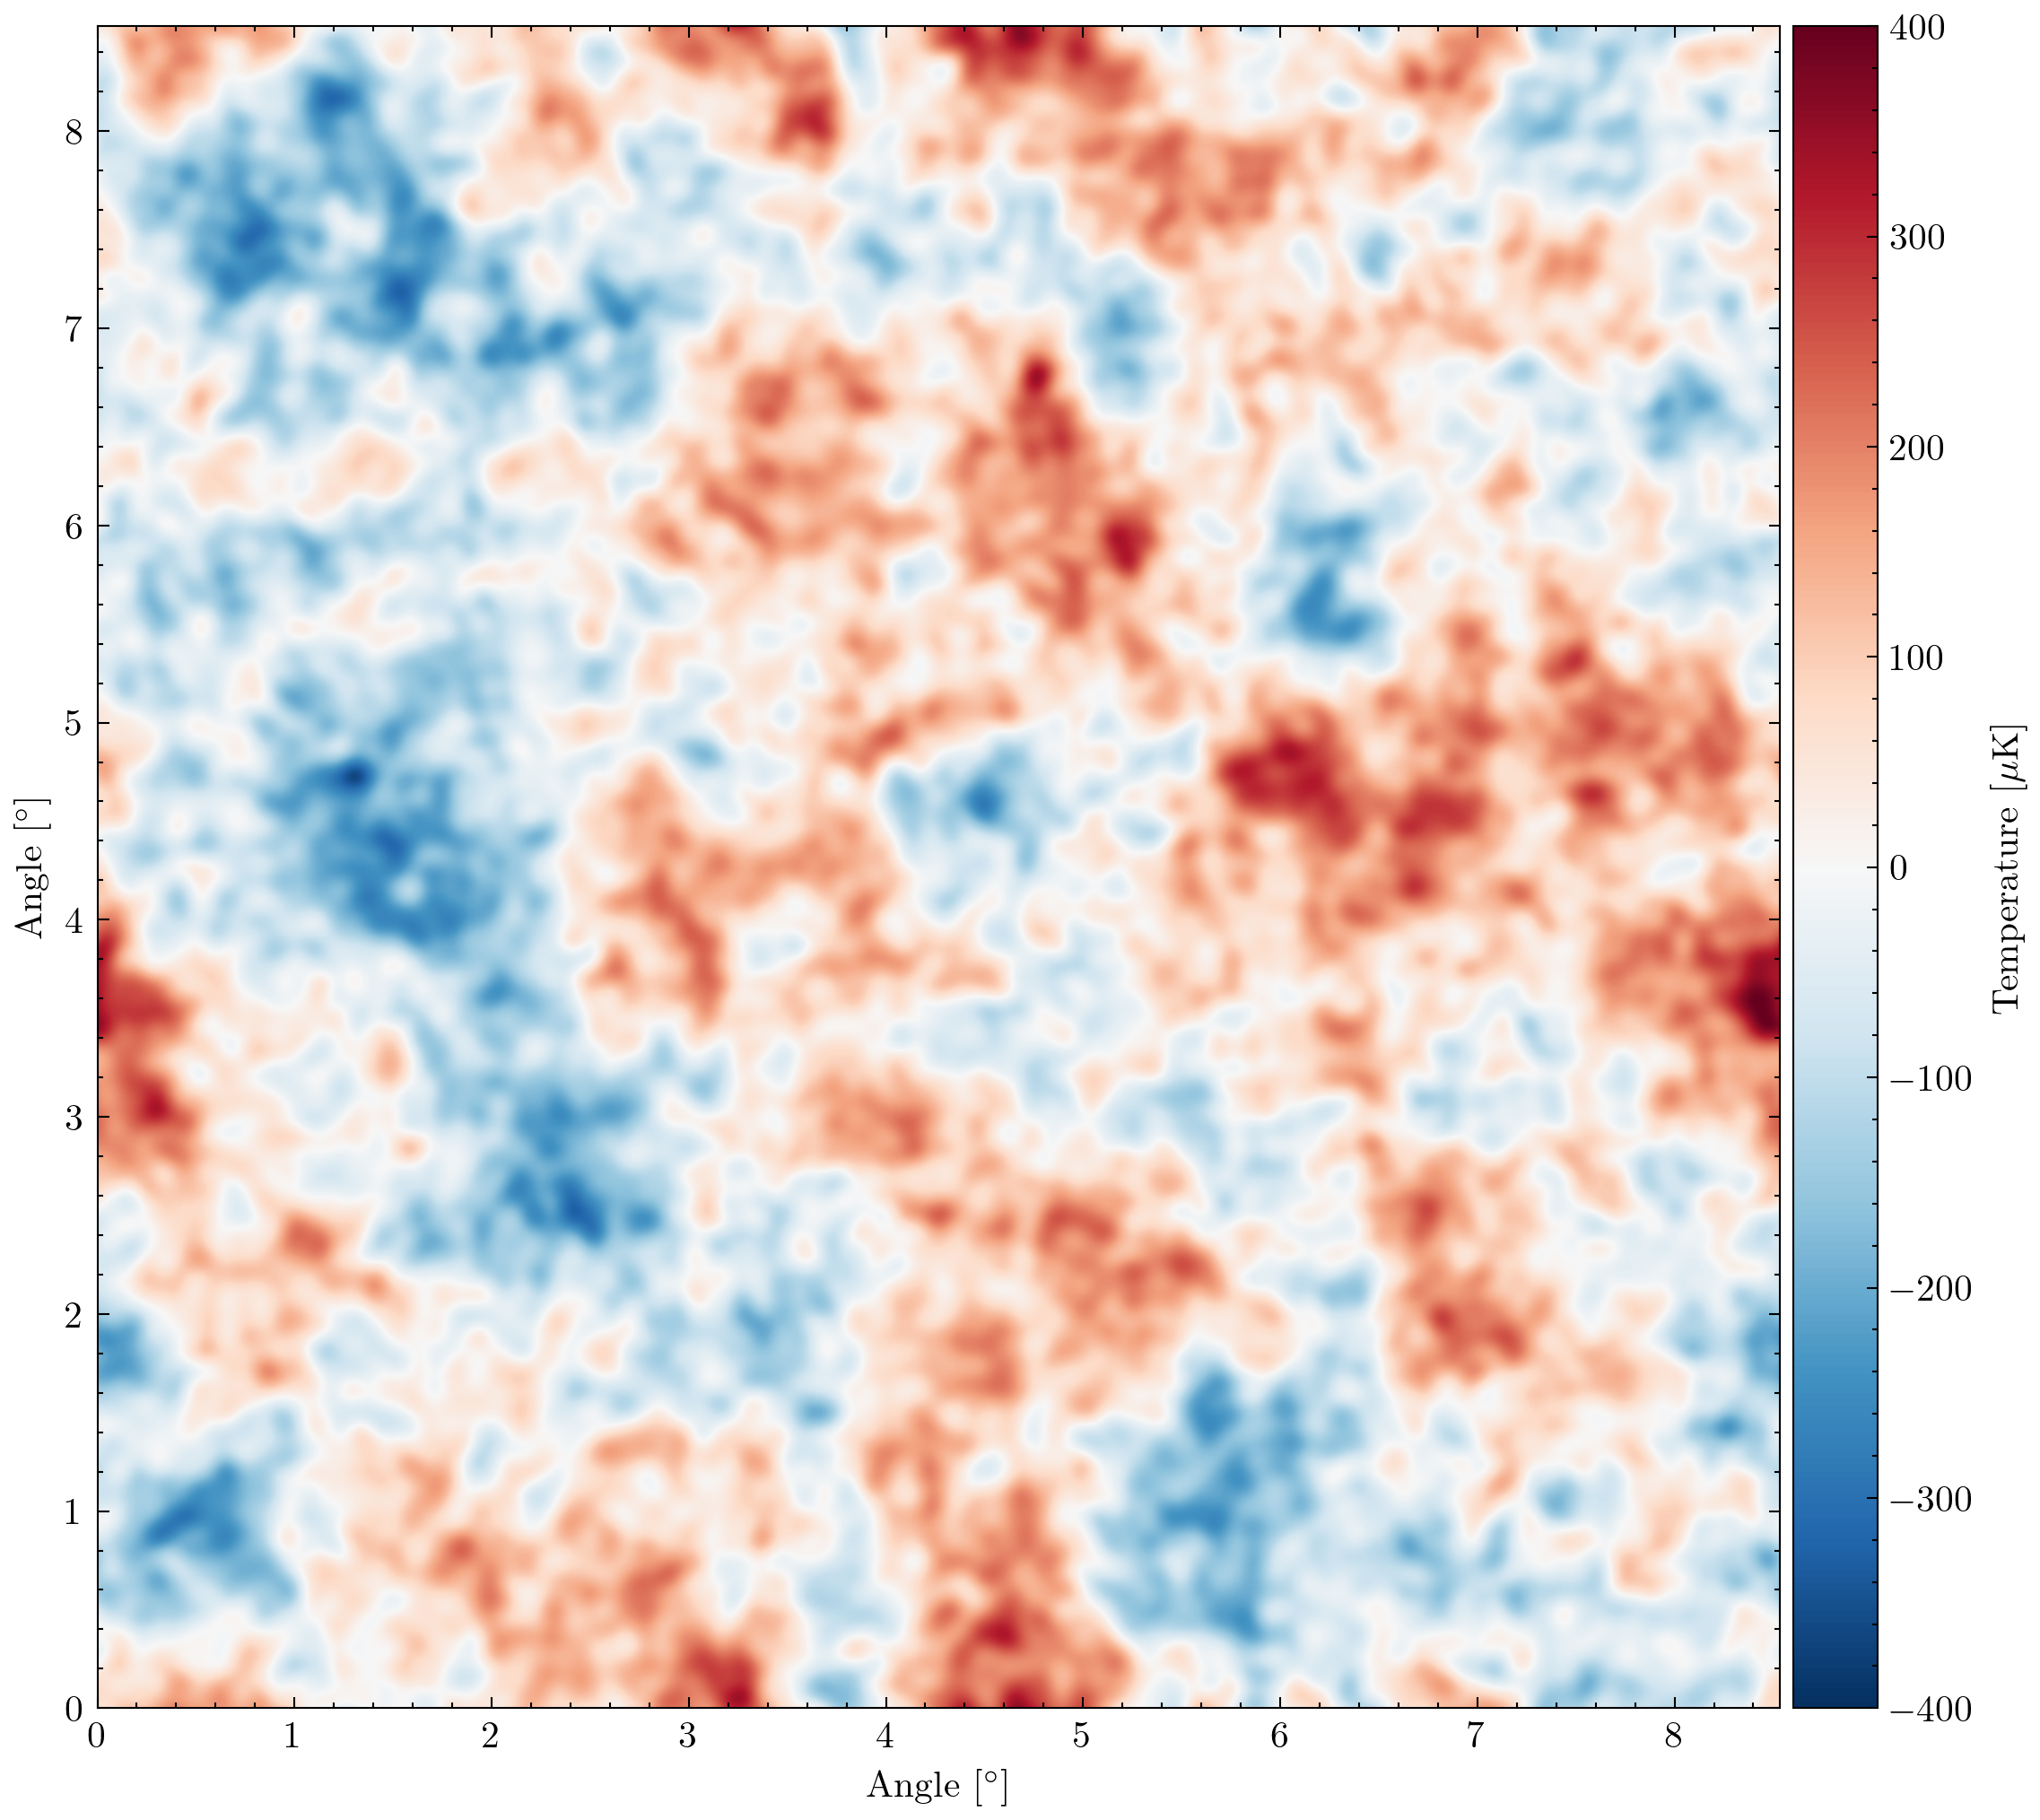

In [7]:
fig = plotter.plot_CMB_map(map2, c_min=-400, c_max=400, x_width=(2**10)*(0.5)/60, y_width=(2**10)*(0.5)/60)

In [8]:
map1.shape
print(1024**2)

1048576
